<a href="https://colab.research.google.com/github/Venchislav/Movie_Recomendation_System/blob/main/SpotifyRecomendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import difflib
import matplotlib.pyplot as plt

In [5]:
df_tracks = pd.read_csv('/content/sample_data/spotify_tracks.csv')
df_tracks.head()

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [23]:
df_tracks.shape

(101939, 32)

In [6]:
df_shorter = df_tracks.head(1000)

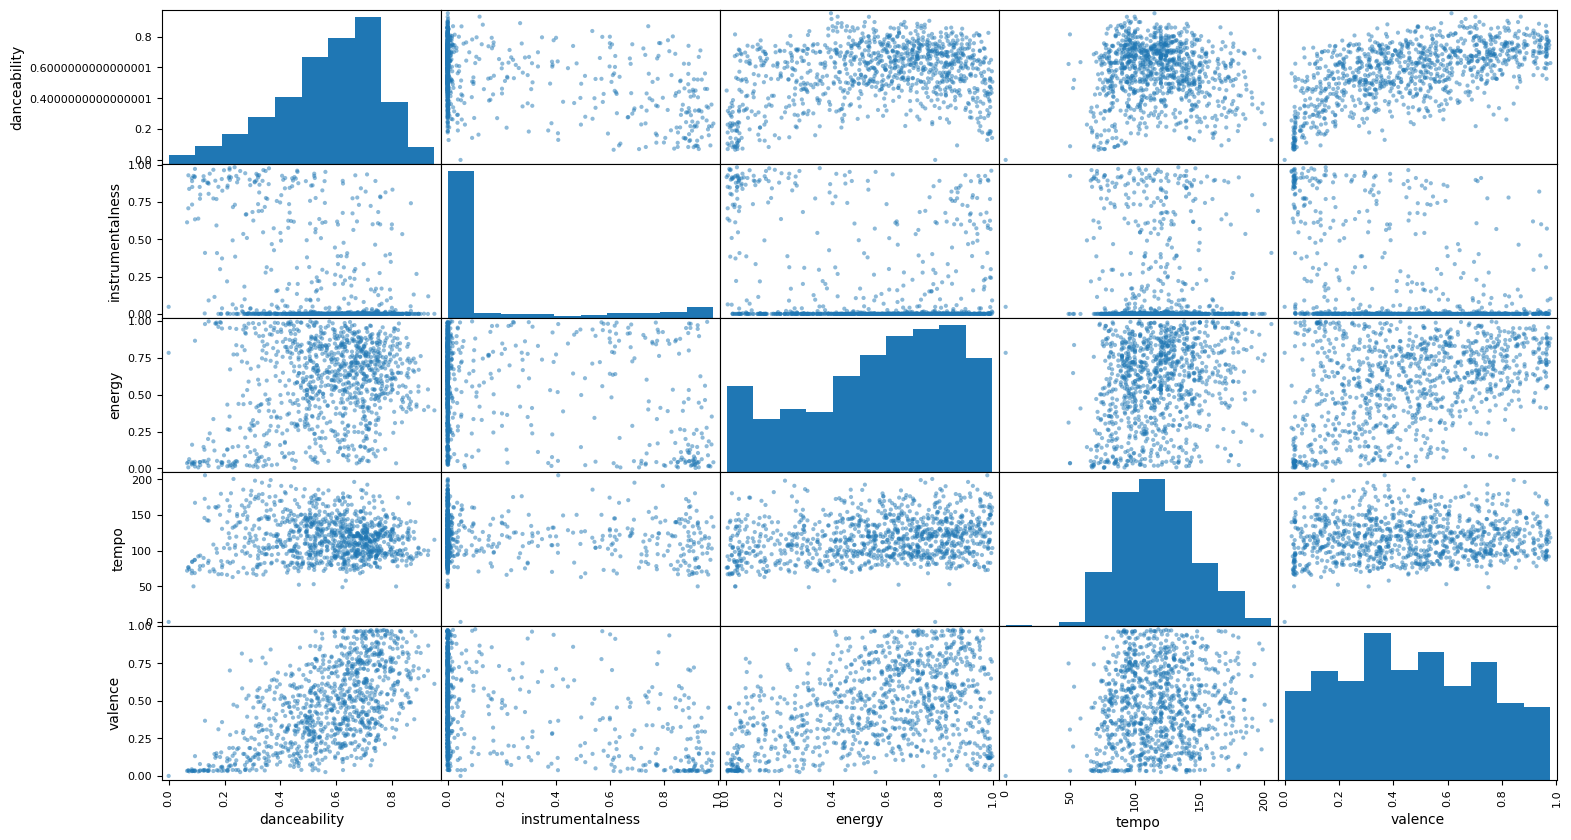

In [11]:
pd.plotting.scatter_matrix(df_shorter[['danceability', 'instrumentalness', 'energy', 'tempo', 'valence']], figsize=(18, 10));

In [13]:
df_shorter.corr()

<ipython-input-13-aac5d94e1bd4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_shorter.corr()


,Unnamed: 0,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_number,valence
Unnamed: 0,1.000000,-0.090561,-0.067619,-0.030364,-0.092055,0.033299,0.020395,0.033754,-0.100778,0.092997,0.008912,0.119121,-0.267225,0.036052,0.054091,-0.037421,-0.000171
acousticness,-0.090561,1.000000,-0.303135,0.099272,0.240985,-0.709649,0.208221,-0.041006,0.057699,-0.653084,0.036824,-0.191332,0.215633,-0.228792,-0.183122,0.105825,-0.278127
danceability,-0.067619,-0.303135,1.000000,-0.114091,-0.191136,0.259135,-0.457904,0.062352,-0.046396,0.355006,-0.076646,0.022864,0.161966,-0.039475,0.126313,0.051929,0.591565
disc_number,-0.030364,0.099272,-0.114091,1.000000,0.087547,-0.102494,0.093065,0.020296,0.022615,-0.132729,0.051964,-0.056085,-0.035340,-0.020678,0.009778,0.015322,-0.047319
duration_ms,-0.092055,0.240985,-0.191136,0.087547,1.000000,-0.207818,0.157113,-0.042869,0.013392,-0.300882,0.033005,-0.172707,0.242160,-0.137092,-0.000078,-0.035228,-0.184452
energy,0.033299,-0.709649,0.259135,-0.102494,-0.207818,1.000000,-0.254379,-0.001232,0.138392,0.826064,-0.020069,0.179367,-0.111669,0.223405,0.215177,-0.144360,0.384176
instrumentalness,0.020395,0.208221,-0.457904,0.093065,0.157113,-0.254379,1.000000,-0.025584,-0.101408,-0.436633,0.049365,-0.037413,-0.185383,-0.062131,-0.032064,-0.071957,-0.377155
key,0.033754,-0.041006,0.062352,0.020296,-0.042869,-0.001232,-0.025584,1.000000,-0.016015,0.033422,-0.136595,-0.006970,-0.022594,-0.002000,-0.021277,0.010354,0.068551
liveness,-0.100778,0.057699,-0.046396,0.022615,0.013392,0.138392,-0.101408,-0.016015,1.000000,0.052868,-0.032161,-0.046329,0.325139,-0.054541,-0.025432,0.113582,-0.041371
loudness,0.092997,-0.653084,0.355006,-0.132729,-0.300882,0.826064,-0.436633,0.033422,0.052868,1.000000,-0.034456,0.250172,-0.220893,0.231072,0.196891,-0.158615,0.365634


In [14]:
from sklearn.cluster import KMeans

In [24]:
m = KMeans(n_clusters=5)
m.fit(df_tracks[['danceability', 'instrumentalness', 'energy', 'tempo', 'valence']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [25]:
print(m.labels_[:10], '\n', min(m.labels_), max(m.labels_))

[4 4 0 4 0 0 0 2 0 0] 
 0 4


In [26]:
df_tracks['type'] = m.labels_

In [28]:
df_tracks.to_csv('/content/sample_data/result.csv')

In [30]:
tracks = pd.read_csv('/content/sample_data/result.csv')

ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')

favorites = tracks[tracks.id.isin(ids)]

cluster_numbers = list(favorites['type'])
clusters = {}
for num in cluster_numbers:
  clusters[num] = cluster_numbers.count(num)


user_favorite_cluster = [(k, v) for k, v in sorted(clusters.items(), key=lambda item: item[1])][0][0]

print('\nFavorite cluster:', user_favorite_cluster, '\n')

suggestions = tracks[tracks.type == user_favorite_cluster]


print(suggestions.head())

Enter comma-separated ids of your favorite songs
> 1xK1Gg9SxG8fy2Ya373oqb,1xQ6trAsedVPCdbtDAmk0c,7ytR5pFWmSjzHJIeQkgog4,079Ey5uxL04AKPQgVQwx5h,0lizgQ7Qw35od7CYaoMBZb,7r9ZhitdQBONTFOiJW5mr8,3ee8Jmje8o58CHK66QrVC2,3ZG8N7aWw2meb6UrI5ZmnZ,5cpJFiNwYyWwFLH0V6B3N8,26w9NTiE9NGjW1ZvIOd1So,7BIy3EGQhg98CsRdKYHnJC,2374M0fQpWi3dLnB54qaLX,2IVsRhKrx8hlQBOWy4qebo,40riOy7x9W7GXjyGp4pjAv,4evmHXcjt3bTUHD1cvny97,0MF5QHFzTUM2dYm6J7Vngt,0TrPqhAMoaKUFLR7iYDokf,07KXEDMj78x68D884wgVEm,6gxKUmycQX7uyMwJcweFjp

Favorite cluster: 1 

    Unnamed: 0.1  Unnamed: 0  acousticness                album_id  \
17            17          17         0.752  1ov9qxlMuwfWA2zdU6WKyJ   
20            20          20         0.471  3Pw2DsAYlat4wHjVrQHYhT   
33            33          33         0.566  7gepxGESKfpacDqy8quSOS   
54            54          54         0.920  6hkfojKabPHetxgdYAAfWP   
56            56          56         0.761  42nsomRaEURVkNt7IF1IFu   

                                         analysis_url  \
17  https:/